<b> Impact of Corona Virus in INDIA </b>

Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans, these viruses cause respiratory tract infections that can range from mild to lethal. Mild illnesses include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. Symptoms in other species vary: in chickens, they cause an upper respiratory tract disease, while in cows and pigs they cause diarrhea. There are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.

The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses.They have characteristic club-shaped spikes that project from their surface, which in electron micrographs create an image reminiscent of the solar corona, from which their name derives.
(Source : https://en.wikipedia.org/wiki/Coronavirus)

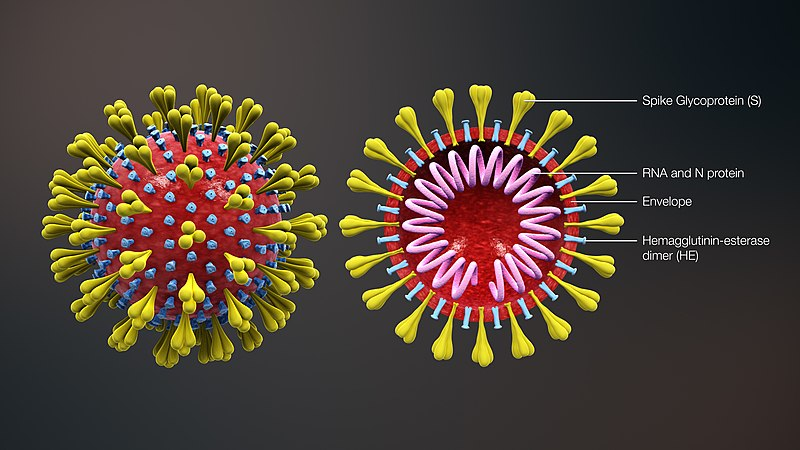
    Image Credits : Scientific Animations under a CC BY-SA 4.0 license


** PLease Upvote if you find this notebook insightful.

In [ ]:
## Loading the Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
!pip install bar_chart_race
import bar_chart_race as bcr
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import os
import folium
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Loading the Dataset
india_dataset = pd.read_csv("/kaggle/input/covid19-in-india/covid_19_india.csv")
india_dataset['State/UnionTerritory'].unique()
india_dataset = india_dataset[~india_dataset['State/UnionTerritory'].isin(['Unassigned', 'Nagaland#', 'Jharkhand#','Cases being reassigned to states'])]
india_dataset['Date'] = pd.to_datetime(india_dataset['Date'],format = "%d/%m/%y")
india_dataset = india_dataset.replace(np.nan,0)
## Loading the dataset
india_date_state_wise_cases = india_dataset.groupby(['Date','State/UnionTerritory'])['Cured','Deaths','Confirmed'].sum().reset_index()
india_date_state_wise_cases['Active_Cases'] = india_date_state_wise_cases['Confirmed'] - (india_date_state_wise_cases['Cured'] + india_date_state_wise_cases['Deaths'])
india_date_state_wise_cases['Mortality Rate(per 100)'] = (india_date_state_wise_cases['Deaths']/india_date_state_wise_cases['Confirmed'])*100

### -------------- Increase of Confirmed of Covid-19 cases in India ----------

In [ ]:
## Total Cases
total_confirmed_cases = india_date_state_wise_cases.groupby(['Date'])['Confirmed'].sum().reset_index()
fig = px.line(total_confirmed_cases, x = "Date", y = "Confirmed")
fig.update_layout(title ='Positive cases of COVID-19',
                   xaxis_title='Date',
                   yaxis_title='Positive of COVID-19 Cases')
fig.show()

### --------- Before and After Active Corona Cases In India --------- 

In [ ]:
total_active_cases = india_date_state_wise_cases.groupby(['Date'])['Active_Cases'].sum().reset_index()
fig = px.line(total_active_cases, x = "Date", y = "Active_Cases")
fig.add_annotation(
            x="2020-03-22",
            y= total_active_cases['Active_Cases'].max(),
            text="Lockdown starts",
             font=dict(
            family="Courier New, monospace",
            size=16,
            color="red"
            ),
)

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0="2020-03-22",
            y0=total_active_cases['Active_Cases'].max(),
            x1="2020-03-22",
    
            line=dict(
                color="red",
                width=3
            )
))
fig.add_annotation(
            x="2020-06-08",
            y= total_active_cases['Active_Cases'].max(),
            text="Lockdown ends",
             font=dict(
            family="Courier New, monospace",
            size=16,
            color="red"
            ),
)

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0="2020-06-08",
            y0=total_active_cases['Active_Cases'].max(),
            x1="2020-06-08",
    
            line=dict(
                color="red",
                width=3
            )
))
fig.update_layout(title ='Positive cases of COVID-19',
                   xaxis_title='Date',
                   yaxis_title='Positive of COVID-19 Cases'
                 )
fig.show()

### ---------- Log Curve of Active Covid-19 Cases over the time ---------

In [ ]:
total_active_cases['log_Active_Cases'] = np.log(total_active_cases['Active_Cases'])
fig = px.line(total_active_cases, x = "Date", y = "log_Active_Cases")
fig.update_layout(title ='Logarithm of Active cases of COVID-19',
                   xaxis_title='Date',
                   yaxis_title='Active Cases of COVID-19')
fig.show()

### ---------- Death Cases from Corona Virus in India ------ 

In [ ]:
total_death_cases = india_date_state_wise_cases.groupby(['Date'])['Deaths'].sum().reset_index()
fig = px.line(total_death_cases, x = "Date", y = "Deaths")
fig.update_layout(title ='Deaths COVID-19',
                   xaxis_title='Date',
                   yaxis_title='Deaths from COVID-19')
fig.show()

### ---------- Log Curve of Death Cases from Corona Virus in India ---------

In [ ]:
total_death_cases['log_Deaths'] = np.log(total_death_cases['Deaths'])
fig = px.line(total_death_cases, x = "Date", y = "log_Deaths")
fig.update_layout(title ='Logarithm of Deaths from COVID-19',
                   xaxis_title='Date',
                   yaxis_title='Deaths of COVID-19')
fig.show()

### ------------- Most Effected States from Covid-19 -------- 

In [ ]:
most_effected_covid_states = india_date_state_wise_cases.groupby('State/UnionTerritory').sum().sort_values('Confirmed',ascending = False)
top10_most_effected_states = most_effected_covid_states.head(10)
top10_most_effected_states['State/UnionTerritory'] = top10_most_effected_states.index
top_states = top10_most_effected_states['State/UnionTerritory'].tolist()
## Check if the states name is present in "top 10 effected states" then include in the dataset
india_date_state_wise_cases_filtered = india_date_state_wise_cases[india_date_state_wise_cases['State/UnionTerritory'].isin(top_states)]

In [ ]:
fig = px.line(india_date_state_wise_cases_filtered, x = "Date", y = "Confirmed", color ='State/UnionTerritory',color_discrete_sequence = px.colors.qualitative.Dark24)
fig.update_layout(title ='State wise cases of COVID-19',
                   xaxis_title='Date',
                   yaxis_title='Confirmed Corona Cases over time State wise')
fig.show()

In [ ]:
fig = px.line(india_date_state_wise_cases_filtered, x = "Date", y = "Active_Cases", color ='State/UnionTerritory')
fig.update_layout(title ='State wise cases of COVID-19',
                   xaxis_title='Date',
                   yaxis_title='Active Corona Cases over time State wise')
fig.show()

In [ ]:
india_date_wise_cases = india_dataset.groupby(['Date'])['Cured','Deaths','Confirmed'].sum().reset_index()
india_date_wise_cases['Active_Cases'] = india_date_wise_cases['Confirmed'] - (india_date_wise_cases['Cured'] + india_date_wise_cases['Deaths'])
fig = go.Figure()
fig.add_trace(go.Scatter(x = india_date_wise_cases['Date'], y = india_date_wise_cases['Confirmed'],
                    mode = 'lines + markers',
                    name = 'Confirmed Cases'))
fig.add_trace(go.Scatter(x = india_date_wise_cases['Date'], y = india_date_wise_cases['Deaths'],
                    mode = 'lines + markers',
                    name = 'Deaths'))
fig.add_trace(go.Scatter(x = india_date_wise_cases['Date'] , y = india_date_wise_cases['Cured'] ,
                    mode ='lines + markers',
                    name ='Cured'))
fig.add_trace(go.Scatter(x = india_date_wise_cases['Date'] , y = india_date_wise_cases['Active_Cases'] ,
                    mode ='lines + markers',
                    name ='Active Cases'))
fig.update_layout(title ='Daily Death,Recovered and New Cases of COVID-19 reported in India',
                   xaxis_title ='Date',
                   yaxis_title ='Cases')


fig.show()

### ---------- State- wise Corona Virus Status ------------------ 

In [ ]:
india_state_covid_cases = india_dataset.drop_duplicates(["State/UnionTerritory"], keep = 'last', inplace = False)
india_state_covid_cases = india_state_covid_cases[["State/UnionTerritory","Cured","Deaths","Confirmed"]]
india_state_covid_cases['Active_Cases'] = india_state_covid_cases['Confirmed'] - (india_state_covid_cases['Cured'] + india_state_covid_cases['Deaths'])
india_state_covid_cases['Mortality Rate (Per 100)'] = np.round((india_state_covid_cases['Deaths']/india_state_covid_cases['Confirmed'])*100,2)
india_state_covid_cases = india_state_covid_cases.replace(np.nan,0)
india_state_covid_cases = india_state_covid_cases.set_index('State/UnionTerritory')
india_state_covid_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (Per 100)"])

In [ ]:
india_state_covid_cases['States'] = india_state_covid_cases.index
india_state_covid_cases['Active_Cases(in %)'] =  (india_state_covid_cases['Active_Cases']/india_state_covid_cases['Active_Cases'].sum()) * 100
fig = px.scatter(india_state_covid_cases, x = "Active_Cases(in %)", y = "Mortality Rate (Per 100)",size = "Mortality Rate (Per 100)", color = "States",
                 hover_name='Active_Cases', log_x = False, size_max = 30)
fig.show()

### ------------- States with Highest reported Confirmed Cases of Covid-19 -------------- 

In [ ]:
most_affected_states = india_dataset.drop_duplicates(["State/UnionTerritory"], keep = 'last', inplace = False)
fig = px.bar(most_affected_states.sort_values('Confirmed',ascending = False)
            .sort_values('Confirmed', ascending = True),
            x = "Confirmed",y = "State/UnionTerritory",
            color_discrete_sequence = px.colors.qualitative.Alphabet,
            title = "Total Confirmed COVID cases till now in India",
            orientation = 'h')
fig.update_layout(title ='State wise COVID-19 Cases',
                   yaxis_title ='State',
                   xaxis_title ='Confirmed Cases from COVID-19')


fig.show()

### -------------- States with Highest Reported Deaths Cases from Covid-19 --------- 

In [ ]:
most_affected_states = india_dataset.drop_duplicates(["State/UnionTerritory"], keep = 'last', inplace = False)
fig = px.bar(most_affected_states.sort_values('Deaths',ascending = False)
            .sort_values('Deaths', ascending = True),
            x = "Deaths",y = "State/UnionTerritory",
            color_discrete_sequence = px.colors.qualitative.Light24,
            title = "Total Deaths COVID cases till now in India",
            orientation = 'h')
fig.update_layout(title ='State wise COVID-19 Cases',
                   yaxis_title ='State',
                   xaxis_title ='Deaths Cases from COVID-19')


fig.show()

### -------------- States with Highest Cured Cases from Covid-19 ----------- 

In [ ]:
fig = px.bar(most_affected_states.sort_values('Cured',ascending = False)
            .sort_values('Cured', ascending = True),
            x = "Cured",y = "State/UnionTerritory",
            color_discrete_sequence = px.colors.qualitative.Dark2,
            title = "Total COVID cases till now in India",
            orientation = 'h')
fig.update_layout(title ='State wise COVID-19 Cases',
                   yaxis_title ='State',
                   xaxis_title ='Cured from COVID-19')


fig.show()

###  --------- States with Highest Covid-19 Testing Done  -----------

In [ ]:
testing_data = pd.read_csv("/kaggle/input/covid19-corona-virus-india-dataset/tests_state_wise.csv")
testing_data = testing_data.fillna(0)
testing_data['Date'] =  pd.to_datetime(testing_data['Updated On'], infer_datetime_format=True)
testing_status = testing_data.sort_values(by='Date', ascending=False)
most_tested_states = testing_status.drop_duplicates(["State"], keep = 'last', inplace = False)
fig = px.bar(most_tested_states.sort_values('Total Tested',ascending = True)
            .sort_values('Total Tested', ascending = True),
            x = "Total Tested",y = "State",
            color_discrete_sequence = px.colors.qualitative.Dark2,
            title = "Total COVID Testing till now in India",
            orientation = 'h')
fig.update_xaxes(title_text="State")
fig.update_yaxes(title_text="Tests per million")
fig.show()

### ------------- Corona Testing done so far in India till Date --------- 

In [ ]:
total_testing = testing_data.groupby('Updated On').sum().sort_values('Total Tested',ascending = True).reset_index()
fig = px.line(total_testing, x = "Updated On", y = "Total Tested")
fig.update_layout(title ='Covid-19 Testing done till date in India',
                   xaxis_title='Date',
                   yaxis_title='Covid-19 Testing till Date')
fig.show()                

### ----------- Mortality Rate of Covid-19 in India  ------- 

In [ ]:
## Merging the dataset with the India Covid dataset
india_coordinates = pd.read_csv("/kaggle/input/states-coordinates/Indian Coordinates_new.csv")
merged_data = pd.merge(india_state_covid_cases,india_coordinates,right_on = 'Name of State / UT',left_on = 'States', how = 'inner')
from IPython.display import display
map_india = folium.Map(location = [20,80],zoom_start = 4,tiles = 'OpenStreetMap',height=500,width="80%")

for lat,lon,value,name in zip(merged_data['Latitude'], merged_data['Longitude'],merged_data['Mortality Rate (Per 100)'], merged_data['States']):
    folium.CircleMarker([lat,lon], radius = value*5,popup = ('<strong>States</strong>: ' + str(name).capitalize() + '<br>'),color = 'red', fill_color = 'red',fill_opacity = 0.3).add_to(map_india)

#map_india
display(map_india)

### --------- Overall Spread of Corona Virus across different states of India from 1st reported case till now

In [ ]:
race_bar_chart_active_cases = india_date_state_wise_cases
active_case_sperad = race_bar_chart_active_cases[['Date','State/UnionTerritory','Active_Cases']]
## Convert the data from long to wide data format
active_case_spread_wide = active_case_sperad.pivot(index='Date', columns='State/UnionTerritory', values='Active_Cases')
active_case_spread_wide = active_case_spread_wide.fillna(0)

In [ ]:
race_chart = active_case_spread_wide
bcr.bar_chart_race(
    df=race_chart,
    filename='covid19_run_barchart.mp4',
    orientation='h',
    sort='desc',
    n_bars=6,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Active Cases: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='COVID-19 Active Cases by States',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)

In [ ]:
bcr.bar_chart_race(df = race_chart, sort = 'desc',steps_per_period = 30,filename = None, figsize = (5,9))

** **Please Note: This Notebook is inspired from Github,other Kaggle kernels and StackOverflow queries.Due respect and credit to all the kagglers.Thanks for motivating me for Publishing my first notebook.****